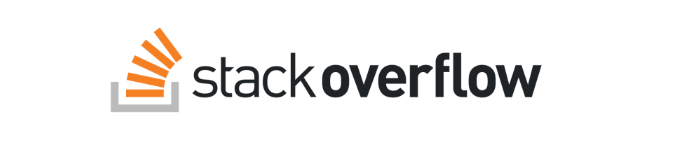

# Compréhension des données

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tag.util import untag

from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import gc
from langdetect import detect
import re
from bs4 import BeautifulSoup
# Download the required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("QueryResults.csv")
print(df.shape)

(50000, 8)


In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Multilingual Android Sdk Documentation,<p>We have a social responsibility project aim...,<android><documentation><translation><javadoc>...,19186586,6,201,NaN,1
1,how can I use animation in cocos2d?,<p>I am trying to develop a Roulette game for ...,<iphone><objective-c><cocoa-touch><animation><...,486609,16,25784,0.0,4
2,"How to extract ""original"" content by xml-signe...",<p>I'm dealing with XML-signature. As you know...,<java><xml><digital-signature><xml-signature><...,40418710,6,3651,0.0,2
3,"Are there any ""gotchas"" in deploying a Cassand...",<p>I am learning about the Apache Cassandra da...,<database><nosql><cassandra><vps><linode>,2291442,11,3031,0.0,1
4,Swing: Change cursor to wait cursor,"<p>See also <a href=""https://stackoverflow.com...",<java><swing><jframe><event-dispatch-thread><m...,21014861,7,38833,0.0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  43578 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df.nunique()

Title            49999
Body             50000
Tags             49082
Id               50000
Score              832
ViewCount        27954
FavoriteCount        3
AnswerCount         69
dtype: int64

In [6]:
# copy
data = df.copy()

## Prétraitement du texte

In [7]:
data = data[['Title', 'Body', 'Tags']]
data.head()

,Title,Body,Tags
0,Multilingual Android Sdk Documentation,<p>We have a social responsibility project aim...,<android><documentation><translation><javadoc>...
1,how can I use animation in cocos2d?,<p>I am trying to develop a Roulette game for ...,<iphone><objective-c><cocoa-touch><animation><...
2,"How to extract ""original"" content by xml-signe...",<p>I'm dealing with XML-signature. As you know...,<java><xml><digital-signature><xml-signature><...
3,"Are there any ""gotchas"" in deploying a Cassand...",<p>I am learning about the Apache Cassandra da...,<database><nosql><cassandra><vps><linode>
4,Swing: Change cursor to wait cursor,"<p>See also <a href=""https://stackoverflow.com...",<java><swing><jframe><event-dispatch-thread><m...


In [8]:
data.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


### Filtre Langue

In [10]:
%%time
for index in data.index:
    data.loc[index,'lang_title'] = detect(data.loc[index,'Title']) 

data['lang_title'].value_counts()

Wall time: 8min 44s


en    46807
fr      495
it      391
ca      353
nl      259
ro      250
da      249
de      211
af      211
no      170
tl      126
es       97
sv       85
pt       73
et       64
id       41
hr       27
cy       24
sl       16
pl       12
fi       11
sq        8
cs        4
sk        3
so        3
tr        2
lv        2
hu        2
lt        2
vi        1
sw        1
Name: lang_title, dtype: int64

In [11]:
# Filtre Anglais
data = data[data['lang_title']=='en']

## Traitements

In [ ]:
%%time

data['Body'] = data['Body'].apply(
    lambda x: BeautifulSoup(x, 'html.parser').get_text())
data['Title'] = data['Title'].apply(
    lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [ ]:
data['Body'][0]

In [ ]:
def clean_text(text):
    text = re.sub(r"\'", " ", text) 
    text = re.sub(r"\n", " ", text) 
    text = re.sub(r"\xa0", " ", text) 
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
%%time

data['Title'] = data['Title'].apply(lambda x: clean_text(x)) 
data['Body'] = data['Body'].apply(lambda x: clean_text(x))

In [ ]:
data['Body'][0]

In [ ]:
%%time

data['Title'] = data['Title'].str.lower()
data['Body'] = data['Body'].str.lower()

In [ ]:
charac = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

def remove_non_alphabetical_character(text):
    """remove all non-alphabetical character"""
    text = re.sub("[^a-z]+", " ", text) # remove all non-alphabetical character
    text = re.sub("\s+", " ", text) # remove whitespaces left after the last operation
    return text

In [ ]:
%%time

data['Title'] = data['Title'].apply(lambda x: remove_non_alphabetical_character(x))
data['Body'] = data['Body'].apply(lambda x: remove_non_alphabetical_character(x)) 

In [ ]:
data['Body'][0]

### Stopwords

In [ ]:
token = ToktokTokenizer()
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    """remove common words in english by using nltk.corpus's list"""
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered)) # Return the text untokenize

In [ ]:
%%time

data['Title'] = data['Title'].apply(lambda x: remove_stopwords(x))
data['Body'] = data['Body'].apply(lambda x: remove_stopwords(x)) 

In [ ]:
data['Body'][0]

### Pos tag

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Lemmatize the text by using tag """
    
    tokens_tagged = nltk.pos_tag(nltk.word_tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)
    lemmatized_text = []
    for word, tag in tokens_tagged:
        if tag.startswith('J'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'a')) # Lemmatisze adjectives. Not doing anything since we remove all adjective
        elif tag.startswith('V'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'v')) # Lemmatisze verbs
        elif tag.startswith('N'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'n')) # Lemmatisze nouns
        elif tag.startswith('R'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'r')) # Lemmatisze adverbs
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no tags has been found, perform a non specific lemmatization
    return " ".join(lemmatized_text) # Return the text untokenize

In [ ]:
%%time

data['Title'] = data['Title'].apply(lambda x: lemmatize_text(x))
data['Body'] = data['Body'].apply(lambda x: lemmatize_text(x))

In [ ]:
data['Body'][0]

## Fusion des Titles & Body

In [ ]:
data['Texte_clean'] = data['Title'] + ' ' + data['Body'] 

In [ ]:
data.to_csv('QueryResults_explored.csv', index=False, header=True)